# Quick start

This section provides a quick introduction to `scipp`.
For in depth explanations refer to the sections in the user guide.

In [1]:
import numpy as np
import scipp as sc
from scipp.plot import plot

We start by creating some variables:

In [2]:
var = sc.Variable(dims=['y', 'x'], values=np.random.rand(4,5))
sc.show(var)
var

<scipp.Variable>          float64    [dimensionless]  (y, x)  [0.388886, 0.529307, ..., 0.250410, 0.334902]

In [3]:
x = sc.Variable(dims=['x'], values=np.arange(5), unit=sc.units.m)
y = sc.Variable(dims=['y'], values=np.arange(4), unit=sc.units.m)

We combine the variables into a data array:

In [4]:
array = sc.DataArray(
    data=var,
    coords={'x': x, 'y': y})
sc.show(array)
array

<scipp.DataArray>
Dimensions: {{y, 4}, {x, 5}}
Coordinates:
    x                         int64      [m]              (x)  [0, 1, ..., 3, 4]
    y                         int64      [m]              (y)  [0, 1, 2, 3]
Data:
                              float64    [dimensionless]  (y, x)  [0.388886, 0.529307, ..., 0.250410, 0.334902]

Variables can have uncertainties.
Scipp stores these as variances (the square of the standard deviation):

In [5]:
array.variances = np.square(np.random.rand(4,5))
sc.show(array)

We create a dataset:

In [6]:
dataset = sc.Dataset(
    {'a': var},
    coords={'x': x, 'y': y, 'aux': x})
dataset['b'] = array
dataset['scalar'] = 1.23 * (sc.units.m / sc.units.s)
sc.show(dataset)

We can slice variables, data arrays, and datasets using a dimension label and an index or a slice object like `i:j`:

In [7]:
dataset['c'] = dataset['b']['x', 2]
sc.show(dataset)
dataset

<scipp.Dataset>
Dimensions: {{x, 5}, {y, 4}}
Coordinates:
    y                         int64      [m]              (y)  [0, 1, 2, 3]
    aux                       int64      [m]              (x)  [0, 1, ..., 3, 4]
    x                         int64      [m]              (x)  [0, 1, ..., 3, 4]
Data:
    a                         float64    [dimensionless]  (y, x)  [0.388886, 0.529307, ..., 0.250410, 0.334902]
    b                         float64    [dimensionless]  (y, x)  [0.388886, 0.529307, ..., 0.250410, 0.334902]  [0.407716, 0.157824, ..., 0.624482, 0.828777]
    c                         float64    [dimensionless]  (y)  [0.455670, 0.706033, 0.917342, 0.158356]  [0.121832, 0.851595, 0.035505, 0.300057]
    scalar                    float64    [m s^-1]         ()  [1.230000]

We can also generate table representations (only 0-D and 1-D) and plots:

In [8]:
sc.table(dataset['y', 2])

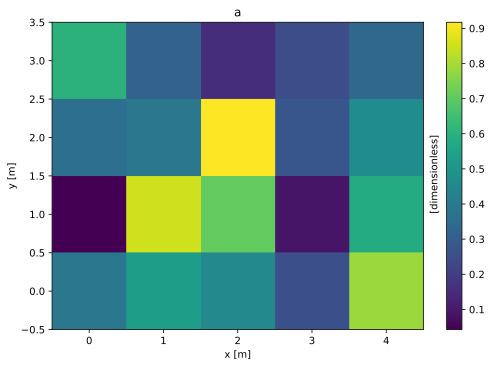

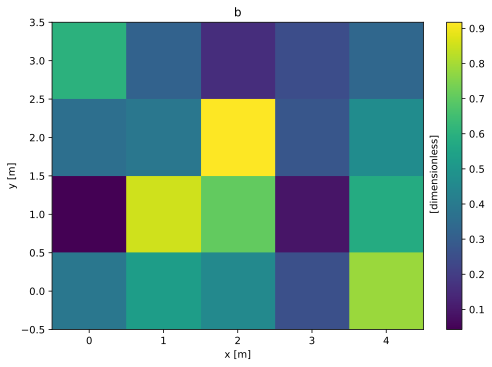

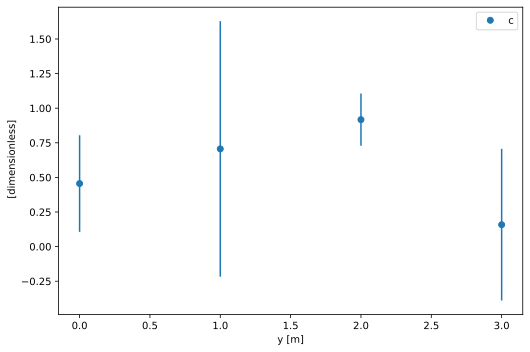

In [9]:
plot(dataset)

Arithmetic operations can be combined with slicing and handle propagation of uncertainties and units:

In [10]:
print(dataset)

<scipp.Dataset>
Dimensions: {{x, 5}, {y, 4}}
Coordinates:
    y                         int64      [m]              (y)  [0, 1, 2, 3]
    aux                       int64      [m]              (x)  [0, 1, ..., 3, 4]
    x                         int64      [m]              (x)  [0, 1, ..., 3, 4]
Data:
    a                         float64    [dimensionless]  (y, x)  [0.388886, 0.529307, ..., 0.250410, 0.334902]
    b                         float64    [dimensionless]  (y, x)  [0.388886, 0.529307, ..., 0.250410, 0.334902]  [0.407716, 0.157824, ..., 0.624482, 0.828777]
    c                         float64    [dimensionless]  (y)  [0.455670, 0.706033, 0.917342, 0.158356]  [0.121832, 0.851595, 0.035505, 0.300057]
    scalar                    float64    [m s^-1]         ()  [1.230000]




In [11]:
dataset['b']['y', 0:2] -= dataset['y', 0:2]['a']['x', 0]
dataset['b'] *= dataset['scalar']
print(dataset)

<scipp.Dataset>
Dimensions: {{x, 5}, {y, 4}}
Coordinates:
    y                         int64      [m]              (y)  [0, 1, 2, 3]
    aux                       int64      [m]              (x)  [0, 1, ..., 3, 4]
    x                         int64      [m]              (x)  [0, 1, ..., 3, 4]
Data:
    a                         float64    [dimensionless]  (y, x)  [0.388886, 0.529307, ..., 0.250410, 0.334902]
    b                         float64    [m s^-1]         (y, x)  [0.000000, 0.172718, ..., 0.308005, 0.411929]  [0.616834, 0.238773, ..., 0.944778, 1.253857]
    c                         float64    [dimensionless]  (y)  [0.455670, 0.706033, 0.917342, 0.158356]  [0.121832, 0.851595, 0.035505, 0.300057]
    scalar                    float64    [m s^-1]         ()  [1.230000]


